In [85]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

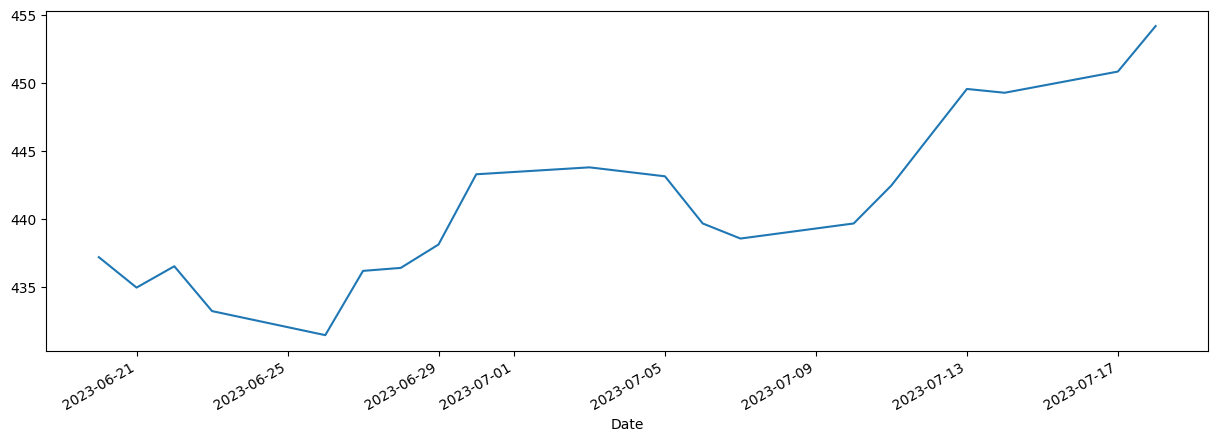

In [7]:

spy = yf.download("SPY", period="1mo")
# spy.close.plot()
spy.Close.plot(figsize=(15,5))

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

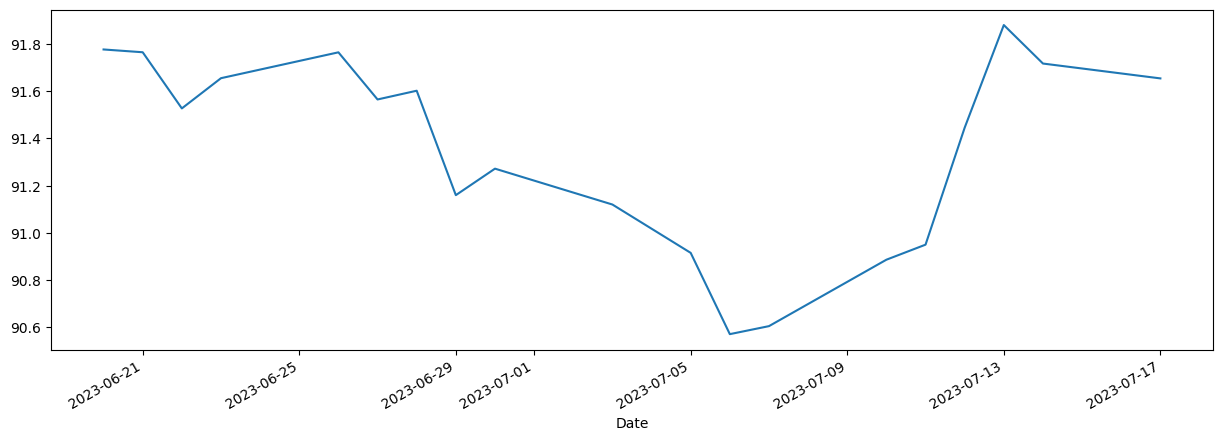

In [10]:

btc = yf.download("BTC", period="1mo")
btc.Close.plot(figsize=(15,5))

In [39]:
# pd.DataFrame({'spy': spy.Close.values, 'btc': btc.Close.values}, index=range(spy.Close.shape[0]))
# spy.Close
# df = pd.concat({'spy': spy.Close, 'btc': btc.Close}).T
# df.columns = ['spy', 'btc']
# df
pd.DataFrame(spy.Close).set_axis([spy], axis=1).join(pd.DataFrame(btc.Close))
# (pd.DataFrame(btc.Close), pd.DataFrame(spy.Close))

ValueError: Length mismatch: Expected axis has 1 elements, new values have 6 elements

In [51]:

import pandas as pd
import numpy as np
import yfinance as yf

tickers = ['spy', 'btc']
stock_data = yf.download(tickers, start="2010-01-1", end="2023-07-1")
# stock_data['Close'].corr()

[*********************100%***********************]  2 of 2 completed


In [146]:
cdf = stock_data['Close'].ffill()#.dropna()

# cdf = cdf.dropna()
cdf #.corr().iloc[0,1]

,BTC,SPY
Date,,
2010-01-04,NaN,113.330002
2010-01-05,NaN,113.629997
2010-01-06,NaN,113.709999
2010-01-07,NaN,114.190002
2010-01-08,NaN,114.570000
...,...,...
2023-06-26,91.764503,431.440002
2023-06-27,91.564903,436.170013
2023-06-28,91.601898,436.390015


Text(0.5, 1.0, 'Rolling 15-day correlation between SPY and Bitcoin')

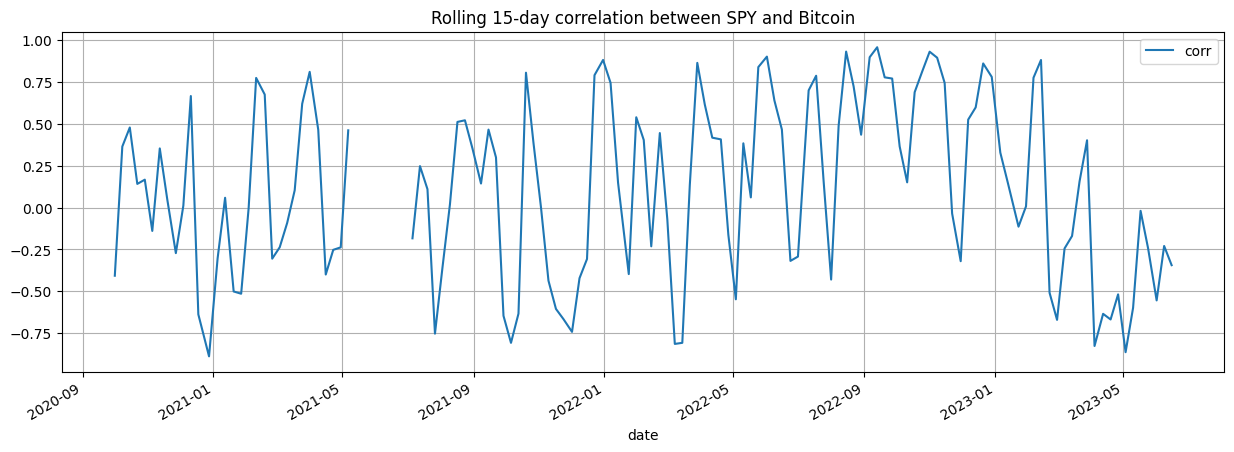

In [143]:
dlen = cdf.shape[0]
wlen = 15
dvd = 3
ws = wlen//dvd
corr = pd.DataFrame([   [cdf.index[dw], cdf.iloc[dw:dw+wlen-1].corr().iloc[0,1]]
    for dw in range(0, dlen - (dvd-1) * ws, ws)
]).set_axis(['date', 'corr'], axis=1).set_index('date')#.ffill()
# plt.plot(corr)
corr.plot(figsize=(15,5))
plt.grid()
plt.title('Rolling 15-day correlation between SPY and Bitcoin')

In [166]:
span2023 = [*cdf.loc['2023-01-01':].index[[0,-1]]]
span2023

[Timestamp('2023-01-03 00:00:00'), Timestamp('2023-06-30 00:00:00')]

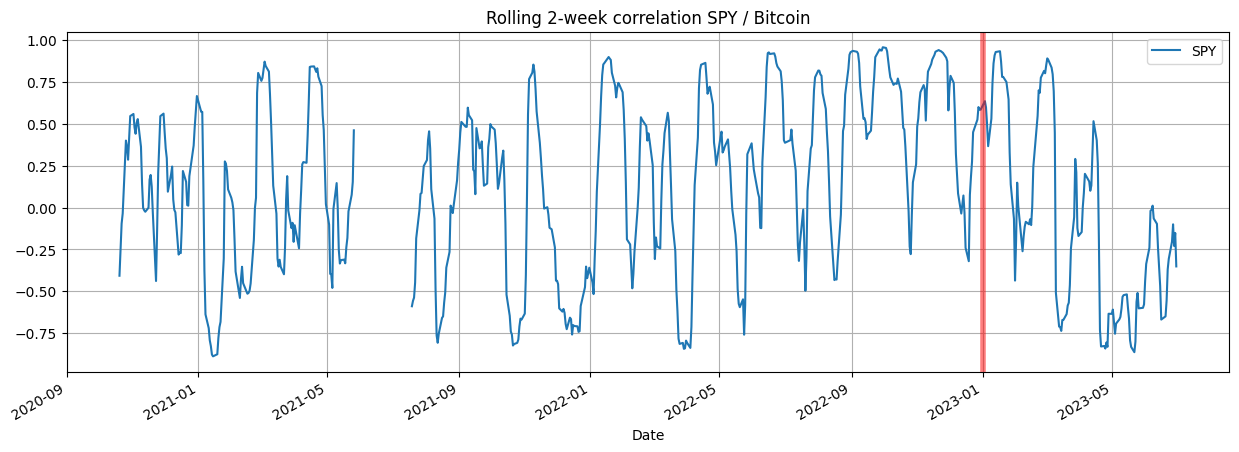

In [170]:
# plt.figure(figsize=(15,5))
pd.DataFrame(cdf.rolling(14).corr().loc[(slice(None),'BTC'),'SPY']).droplevel(1).plot(figsize=(15,5))
# plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title('Rolling 2-week correlation SPY / Bitcoin')
# plt.fill_betweenx([span2023[0]], [span2023[1]])
plt.axvline('2023-01-01', lw=4, color='r', alpha=0.5)
plt.grid()
